# Try them all! : Customer segmentation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Dataset/online_retail_II.csv')

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
df = df.dropna()
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [74]:
df[~df['Invoice'].str.startswith('C')]

KeyboardInterrupt: 

In [5]:
invalid_codes = [item for item in set(df['StockCode']) if not item[0].isdigit()]
invalid_codes

['D',
 'PADS',
 'TEST001',
 'ADJUST',
 'SP1002',
 'C2',
 'M',
 'ADJUST2',
 'DOT',
 'CRUK',
 'TEST002',
 'POST',
 'BANK CHARGES']

In [6]:
df = df[~df['StockCode'].isin(invalid_codes)]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
df['Customer ID'].unique().shape

(5876,)

In [8]:
customer_df = df[['Customer ID', 'StockCode', 'Quantity']].groupby(['Customer ID', 'StockCode']).sum().reset_index().pivot(index='Customer ID', columns='StockCode', values='Quantity').fillna(0)
customer_df

StockCode,10002,10080,10109,10120,10123C,10123G,10124A,10124G,10125,10133,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18284.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18285.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
customer_df.describe()

StockCode,10002,10080,10109,10120,10123C,10123G,10124A,10124G,10125,10133,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
count,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,...,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000
mean,1.259530,0.051566,0.000681,0.107897,0.082029,0.194350,0.010551,0.006297,0.343091,0.566882,...,0.005276,0.008850,0.009020,0.018550,0.007318,0.002212,0.003914,0.002383,0.010722,0.002893
std,23.520896,1.324555,0.052182,1.703643,2.421129,14.403818,0.225727,0.185778,7.016944,5.875774,...,0.190335,0.322633,0.286586,0.679547,0.286040,0.157086,0.168553,0.157624,0.646078,0.160293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-6.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1484.000000,74.000000,4.000000,60.000000,144.000000,1104.000000,9.000000,10.000000,450.000000,190.000000,...,12.000000,15.000000,16.000000,47.000000,17.000000,12.000000,12.000000,12.000000,48.000000,12.000000


In [13]:
customer_df.sum(axis=1)

Customer ID
12346.0      24.0
12347.0    3286.0
12348.0    2704.0
12349.0    1616.0
12350.0     196.0
            ...  
18283.0    1731.0
18284.0     493.0
18285.0     144.0
18286.0     591.0
18287.0    3010.0
Length: 5876, dtype: float64

# K-means

In [14]:
from sklearn.cluster import KMeans

In [15]:
MIN_K = 2
MAX_K = 20

In [36]:
results_kmeans = {}

for k in range(MIN_K, MAX_K+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customer_df)
    results_kmeans[k] = {
        'labels': kmeans.labels_,
        'centroids': kmeans.cluster_centers_,
        'inertia': kmeans.inertia_,
        'n_iter': kmeans.n_iter_
    }
    print('{}-means: with {} iterations , Inertia={}'.format(k, results_kmeans[k]['n_iter'], results_kmeans[k]['inertia']))

2-means: with 2 iterations , Inertia=9660592275.875387
3-means: with 2 iterations , Inertia=8546112040.408232
4-means: with 2 iterations , Inertia=7548806832.344158
5-means: with 6 iterations , Inertia=6892891044.320343
6-means: with 2 iterations , Inertia=6319615662.049996
7-means: with 2 iterations , Inertia=5824076040.46761
8-means: with 2 iterations , Inertia=5207774805.972226
9-means: with 2 iterations , Inertia=4837396233.977667
10-means: with 2 iterations , Inertia=4409546662.946862
11-means: with 12 iterations , Inertia=4317358805.599599
12-means: with 6 iterations , Inertia=4118618489.890402
13-means: with 6 iterations , Inertia=3635924286.2080264
14-means: with 11 iterations , Inertia=3496763485.563113
15-means: with 5 iterations , Inertia=3348754529.5590444
16-means: with 7 iterations , Inertia=3187800348.528442
17-means: with 6 iterations , Inertia=3020667889.840274
18-means: with 8 iterations , Inertia=2928751345.6117153
19-means: with 3 iterations , Inertia=2744454887.382

In [17]:
from matplotlib import pyplot as plt

In [38]:
for k in results_kmeans:
    print(np.unique(results_kmeans[k]['labels'], return_counts=True))

(array([0, 1]), array([5875,    1], dtype=int64))
(array([0, 1, 2]), array([5874,    1,    1], dtype=int64))
(array([0, 1, 2, 3]), array([5872,    1,    2,    1], dtype=int64))
(array([0, 1, 2, 3, 4]), array([  16, 5856,    1,    2,    1], dtype=int64))
(array([0, 1, 2, 3, 4, 5]), array([5869,    2,    1,    2,    1,    1], dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6]), array([5868,    1,    2,    1,    1,    1,    2], dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([5864,    1,    2,    4,    2,    1,    1,    1], dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([5866,    1,    1,    1,    2,    2,    1,    1,    1], dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([5858,    2,    1,    1,    1,    1,    2,    2,    6,    2],
      dtype=int64))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([   9,    1,    7,    1, 5849,    1,    2,    1,    2,    1,    2],
      dtype=int64))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([  20, 5

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
customer_2d = pca.fit_transform(customer_df)

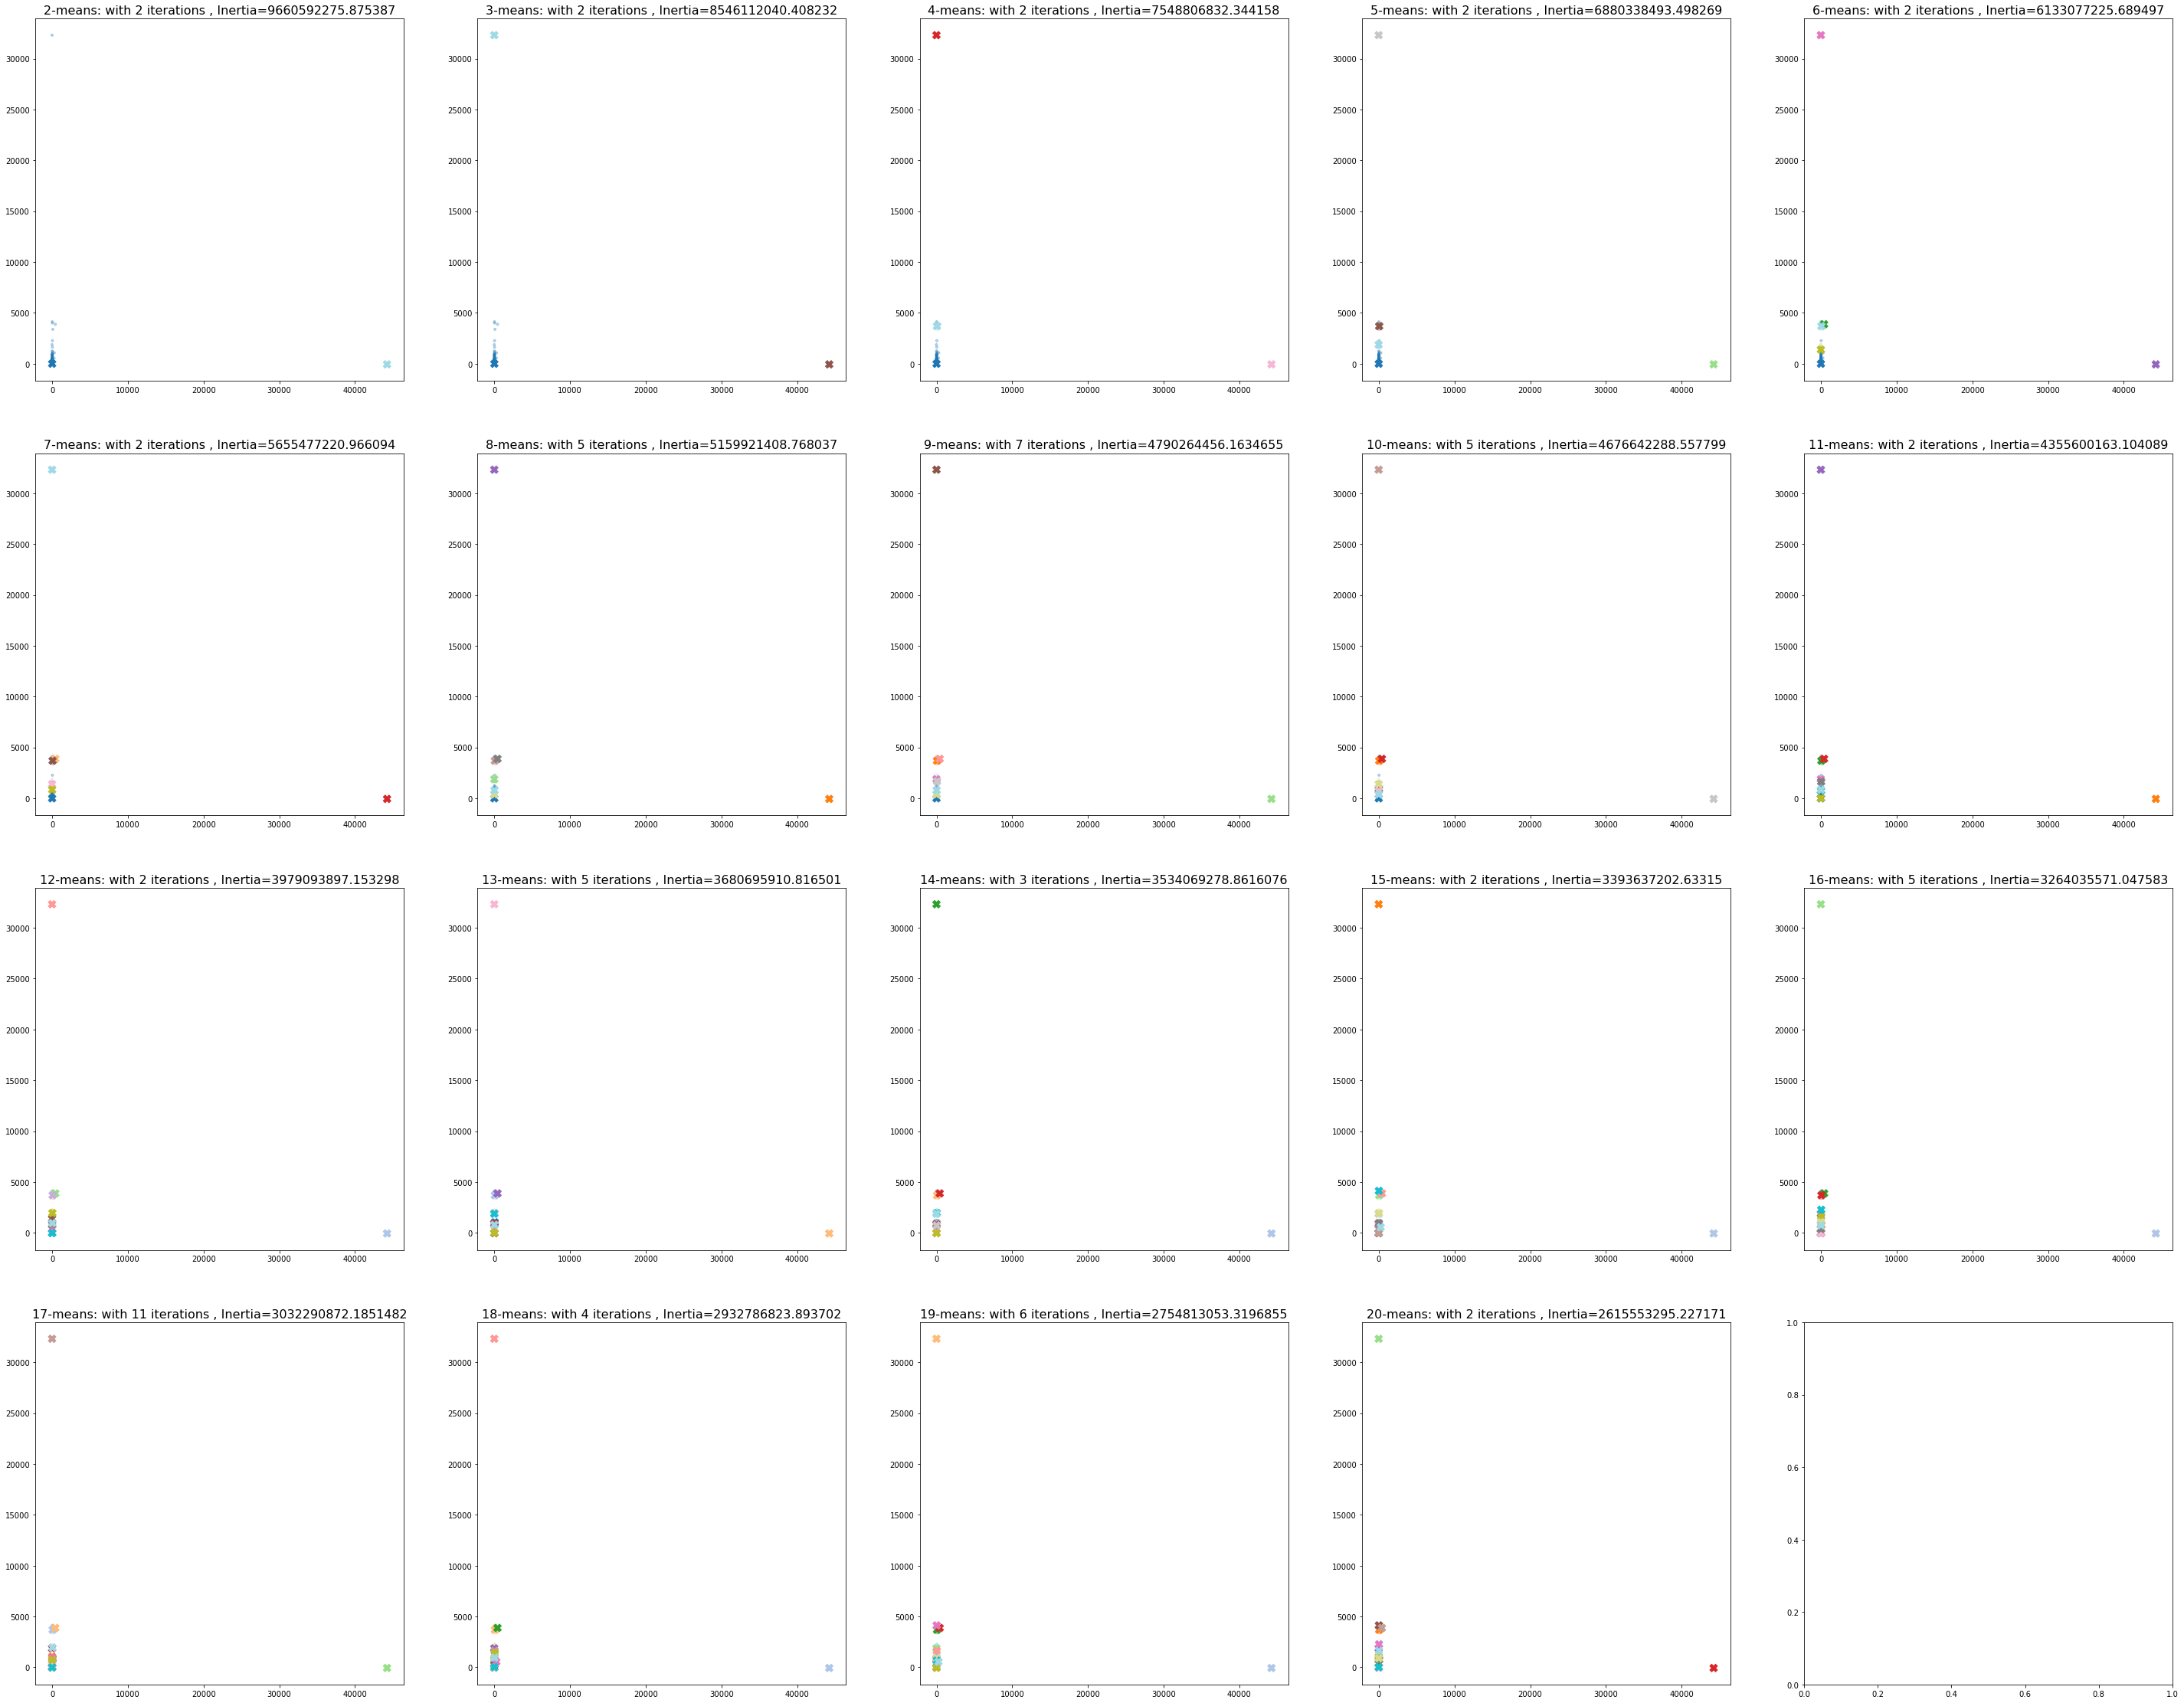

In [22]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k-1) // ncols + 1

fig, ax = plt.subplots(nrows, ncols, figsize=(10*ncols,10*nrows))
for i, k in enumerate(results_kmeans):
    row = i // 5
    col = i % 5
    
    centroids = pca.transform(results_kmeans[k]['centroids'])

    ax[row,col].scatter(x=customer_2d[:,0], y=customer_2d[:,1], marker='.', c=results_kmeans[k]['labels'], alpha=.3, cmap='tab20')
    ax[row,col].scatter(x=centroids[:,0], y=centroids[:,1], c=range(k), marker='X', s=100, cmap='tab20')
    ax[row,col].set_title('{}-means: with {} iterations , Inertia={}'.format(k, results_kmeans[k]['n_iter'], results_kmeans[k]['inertia']), fontsize=16)
plt.show()

# Density-based clustering

In [23]:
from sklearn.cluster import DBSCAN

In [30]:
results = {}

for m in ['euclidean', 'cityblock', 'manhattan', 'hamming', 'jaccard']:
    dbscan = DBSCAN(metric=m)
    dbscan.fit(customer_df)
    results[m] = {
        'labels': dbscan.labels_,
    }
    print('DBSCAN with {}'.format(m))

DBSCAN with euclidean
DBSCAN with cityblock
DBSCAN with manhattan
DBSCAN with hamming


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


DBSCAN with jaccard


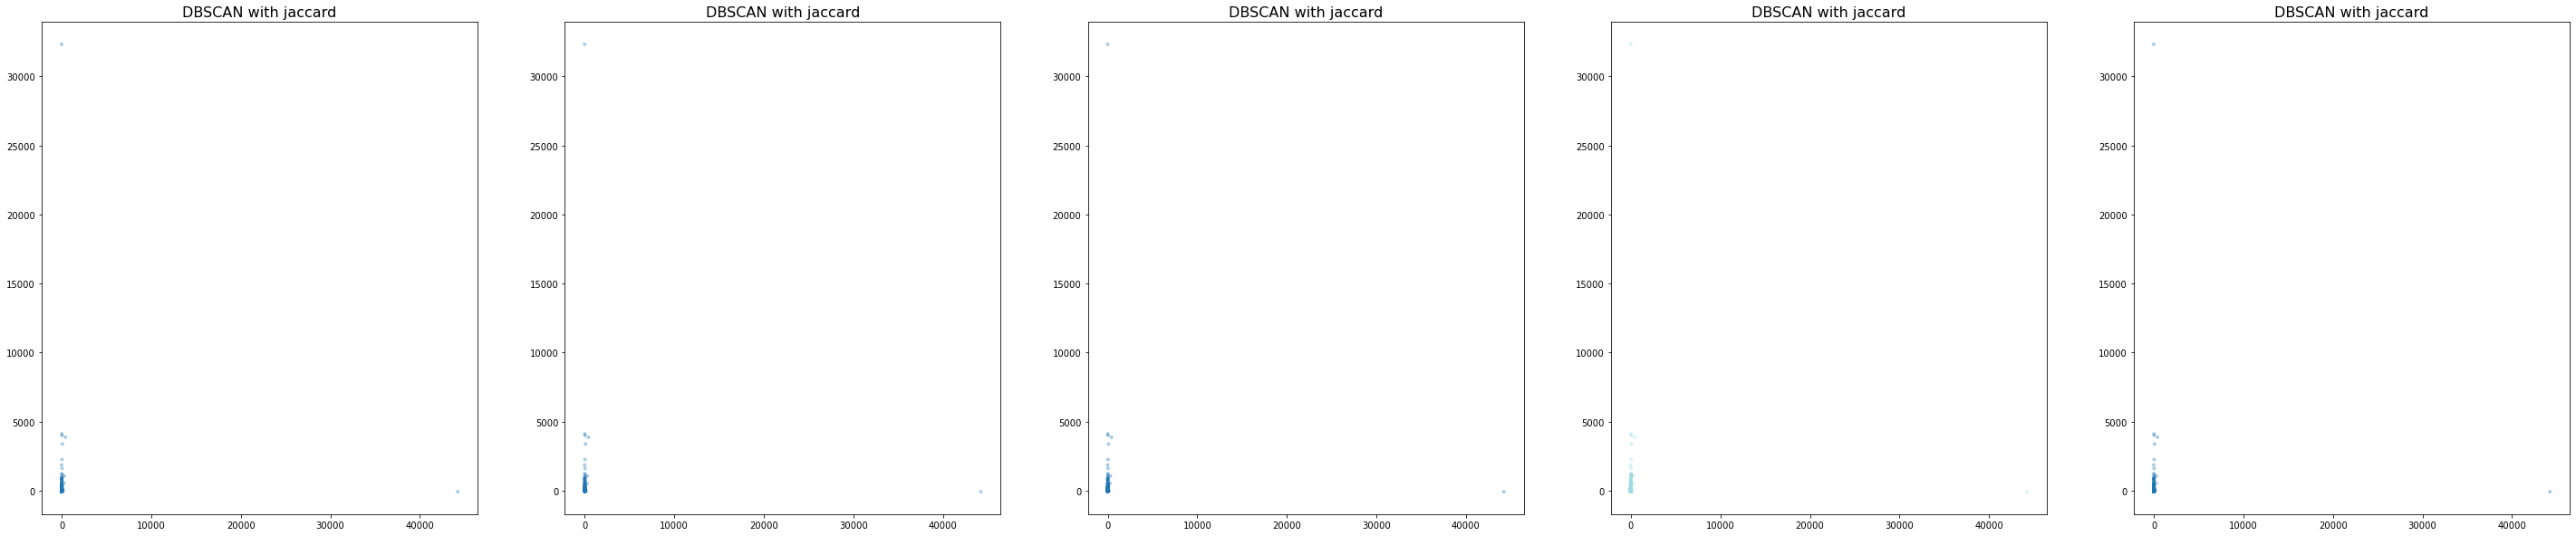

In [31]:
n_k = len(results)

ncols = 5
nrows = (n_k-1) // ncols + 1

fig, ax = plt.subplots(nrows, ncols, figsize=(10*ncols,10*nrows))
for i, k in enumerate(results):
    row = i // 5
    col = i % 5
    
    if nrows == 1:
        ax[col].scatter(x=customer_2d[:,0], y=customer_2d[:,1], marker='.', c=results[k]['labels'], alpha=.3, cmap='tab20')
        ax[col].set_title('DBSCAN with {}'.format(m), fontsize=16)
    else:
        ax[row,col].scatter(x=customer_2d[:,0], y=customer_2d[:,1], marker='.', c=results[k]['labels'], alpha=.3, cmap='tab20')
        ax[row,col].set_title('DBSCAN with {}'.format(m), fontsize=16)
plt.show()

In [32]:
results

{'euclidean': {'labels': array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)},
 'cityblock': {'labels': array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)},
 'manhattan': {'labels': array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)},
 'hamming': {'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)},
 'jaccard': {'labels': array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)}}

In [39]:
for m in results:
    print(m, np.unique(results[m]['labels'], return_counts=True))

euclidean (array([-1,  0], dtype=int64), array([5860,   16], dtype=int64))
cityblock (array([-1,  0], dtype=int64), array([5860,   16], dtype=int64))
manhattan (array([-1,  0], dtype=int64), array([5860,   16], dtype=int64))
hamming (array([-1,  0], dtype=int64), array([   1, 5875], dtype=int64))
jaccard (array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64), array([5807,   16,   14,   14,    9,    6,    5,    5], dtype=int64))


In [64]:
clusters = {}
for i in set(results['jaccard']['labels']):
    clusters[i] = customer_df.iloc[np.where(results['jaccard']['labels'] == i)]
#     print(i, clusters[i].sum(axis=1))
    print(i, len(df[df['Customer ID'].isin(clusters[i].index)]['Description']))

0 410
1 18
2 42
3 99
4 11
5 9
6 212
-1 819825


In [72]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df[df['Customer ID'].isin(clusters[3].index)].sort_values(by=['Customer ID', 'Description'])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
785341,559768,15036,ASSORTED COLOURS SILK FAN,24,2011-07-12 11:35:00,0.83,13207.0,United Kingdom
1024209,578535,15036,ASSORTED COLOURS SILK FAN,24,2011-11-24 14:52:00,0.83,13207.0,United Kingdom
1024207,578535,85175,CACTI T-LIGHT CANDLES,16,2011-11-24 14:52:00,0.42,13207.0,United Kingdom
150503,503725,15056BL,EDWARDIAN PARASOL BLACK,12,2010-04-06 16:37:00,5.95,13207.0,United Kingdom
150504,503725,15056N,EDWARDIAN PARASOL NATURAL,12,2010-04-06 16:37:00,5.95,13207.0,United Kingdom
339099,522456,15056N,EDWARDIAN PARASOL NATURAL,12,2010-09-14 15:44:00,5.95,13207.0,United Kingdom
785342,559768,15056N,EDWARDIAN PARASOL NATURAL,12,2011-07-12 11:35:00,5.95,13207.0,United Kingdom
150505,503725,15056P,EDWARDIAN PARASOL PINK,6,2010-04-06 16:37:00,5.95,13207.0,United Kingdom
150502,503725,20679,EDWARDIAN PARASOL RED,6,2010-04-06 16:37:00,5.95,13207.0,United Kingdom
1024208,578535,72741,GRAND CHOCOLATECANDLE,18,2011-11-24 14:52:00,1.45,13207.0,United Kingdom
